## Task 2

## Unemployment Analysis with Python

## About the dataset

The two datasets explains the unemployment rate in different states of India in the Covid 19 period.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
df_19_20= pd.read_csv("C:\\Users\\ASUS\\Downloads\\unemployment_in_India.csv")

In [3]:
df_19_20.head()

,State,Date,Frequency,Estimated_Unemployment_Rate (%),Estimated_Employed,Estimated_Labour_Participation_Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df_19_20.describe()

,Estimated_Unemployment_Rate (%),Estimated_Employed,Estimated_Labour_Participation_Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### Exploratory Data Analysis

In [5]:
#check for missing values in 2019-2020 data
print(df_19_20.isnull().sum())
df_19_20.dropna()
df_19_20.shape

State                                       14
 Date                                       14
 Frequency                                  14
 Estimated_Unemployment_Rate (%)            14
 Estimated_Employed                         14
 Estimated_Labour_Participation_Rate (%)    14
Area                                        14
dtype: int64


(754, 7)

### Univariate Analysis

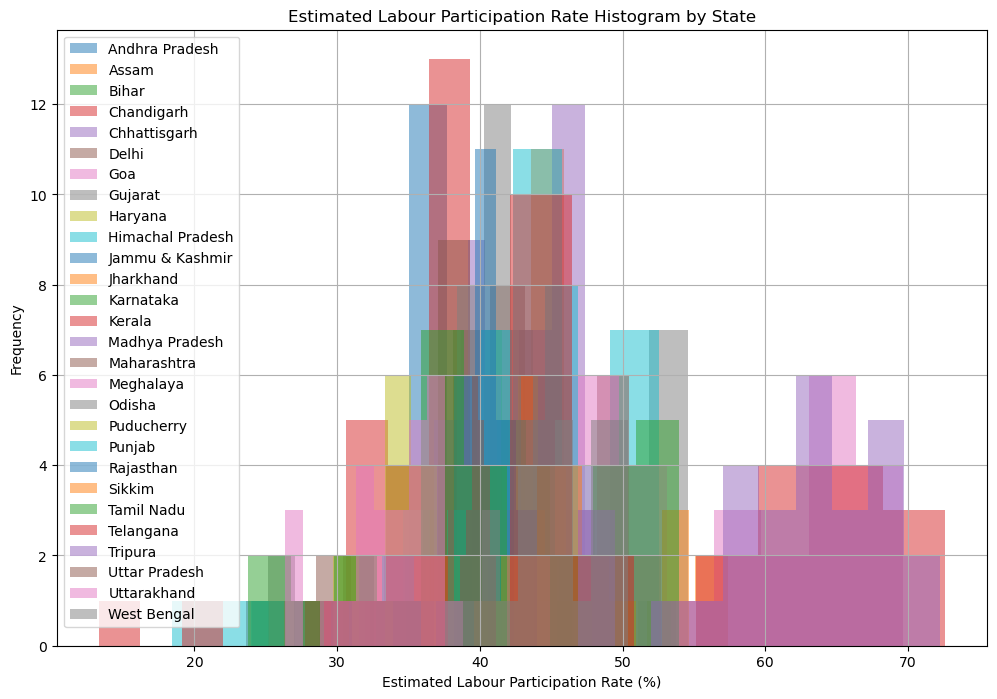

In [6]:
df_19_20 = pd.DataFrame(df_19_20)

# Getting unique states
states = df_19_20['State'].unique()

# Grouping data by state
grouped_data = df_19_20.groupby('State')

# Plotting histograms for each state
plt.figure(figsize=(12, 8))
for state, group in grouped_data:
    plt.hist(group[' Estimated_Labour_Participation_Rate (%)'], bins=10, alpha=0.5, label=state)

plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Estimated Labour Participation Rate Histogram by State')
plt.legend()
plt.grid(True)
plt.show()

Telangana contains the highest labour participation rate.

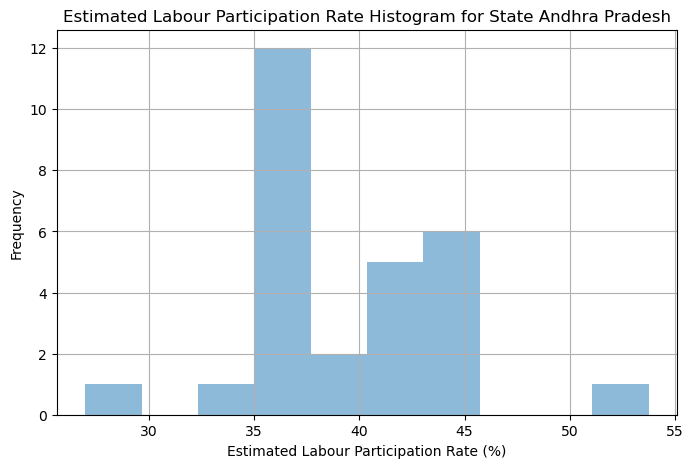

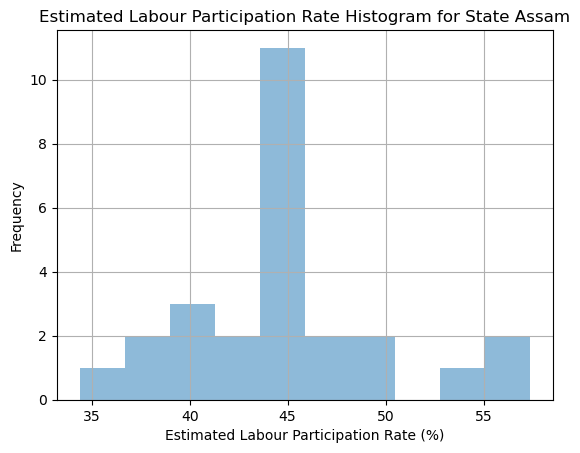

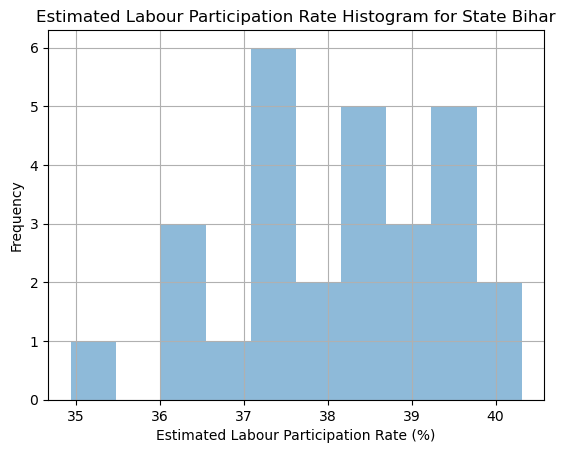

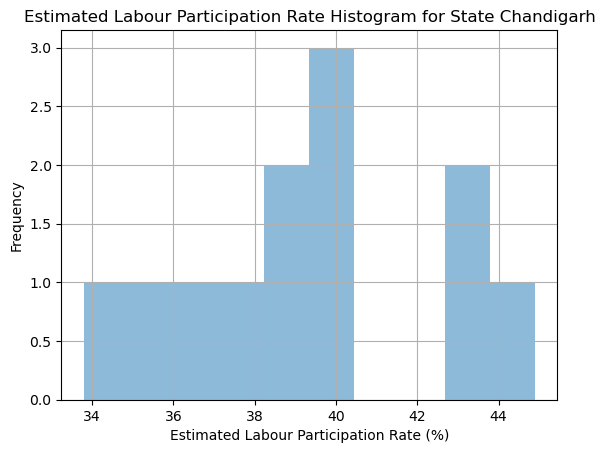

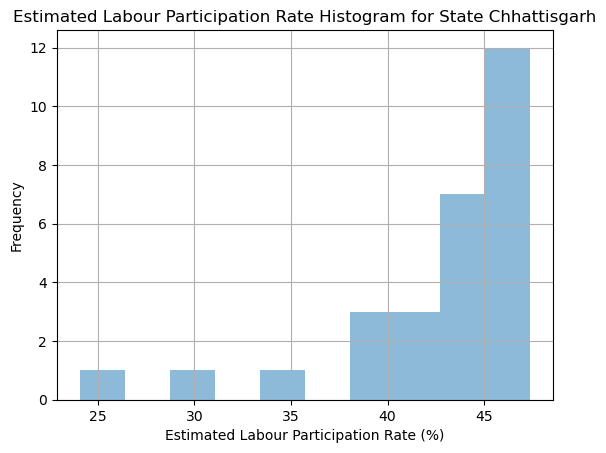

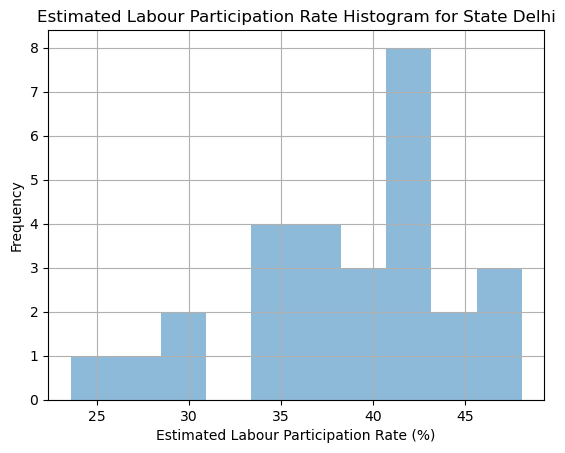

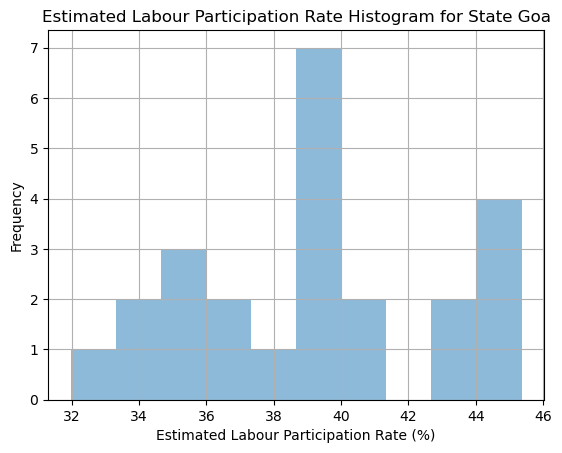

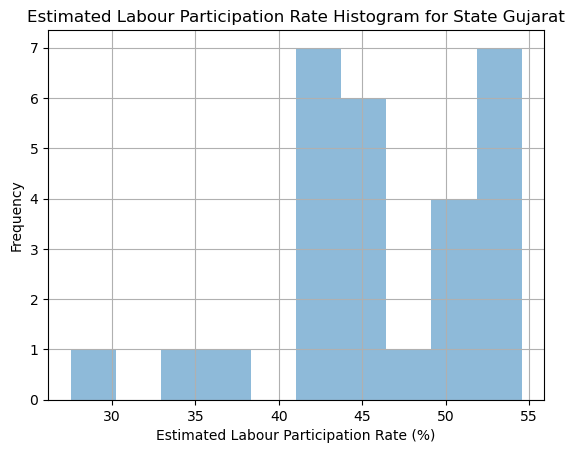

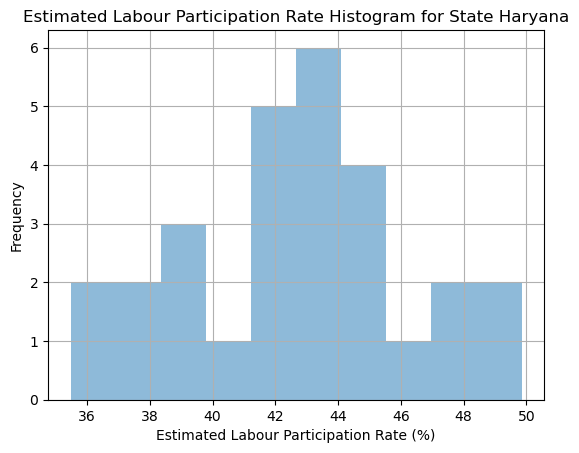

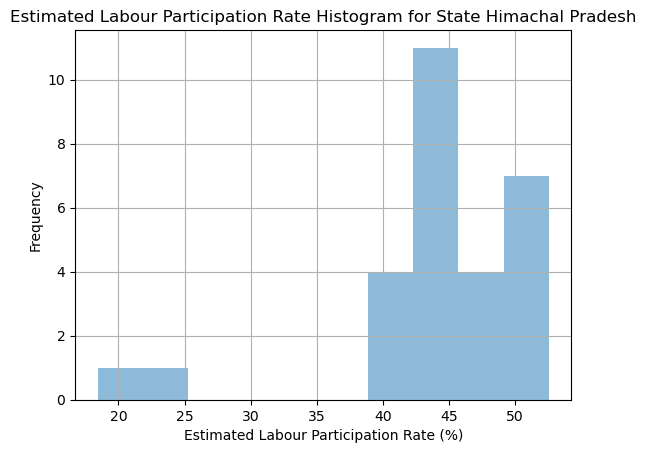

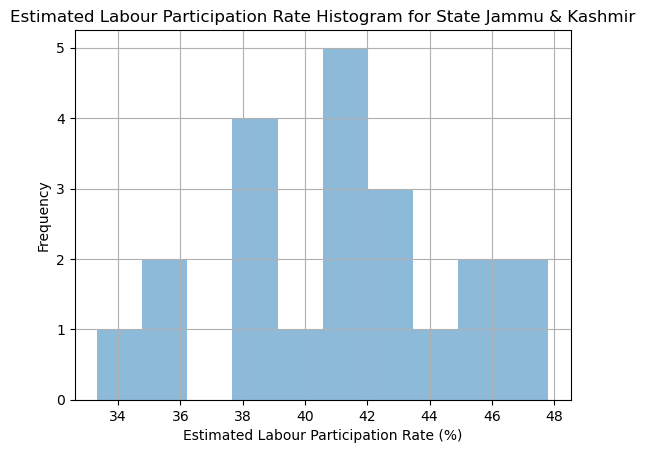

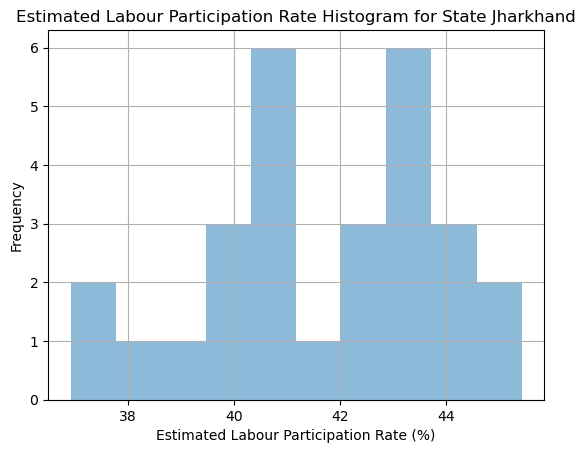

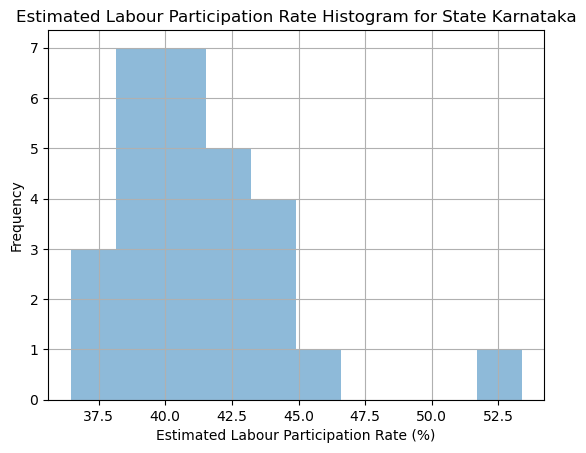

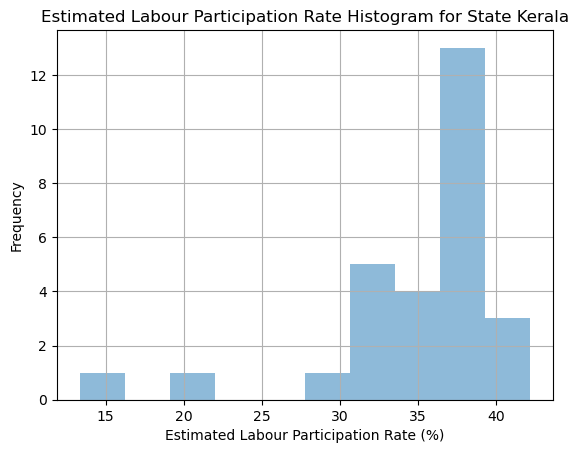

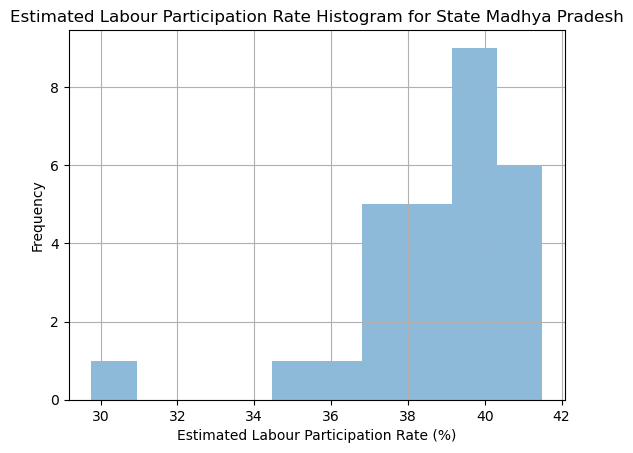

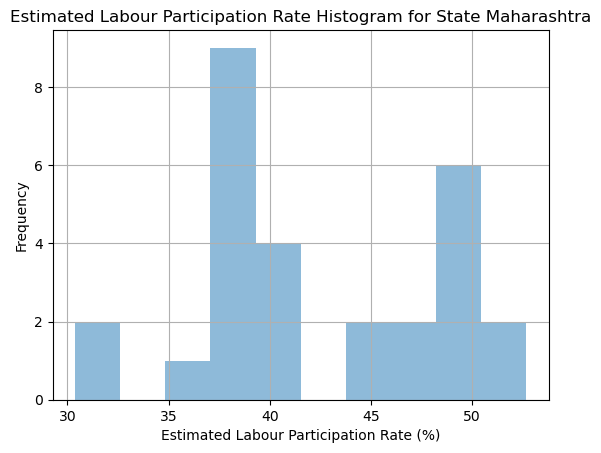

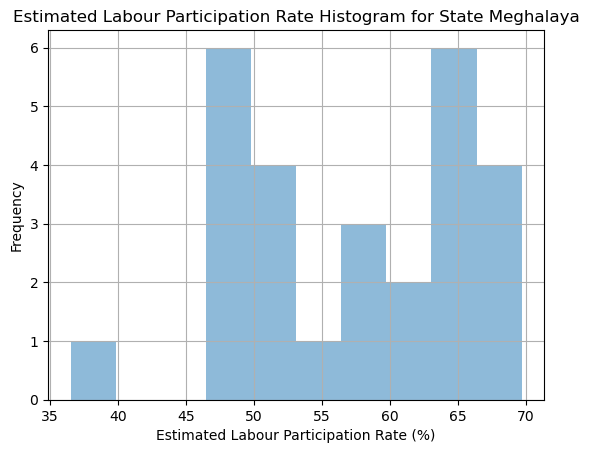

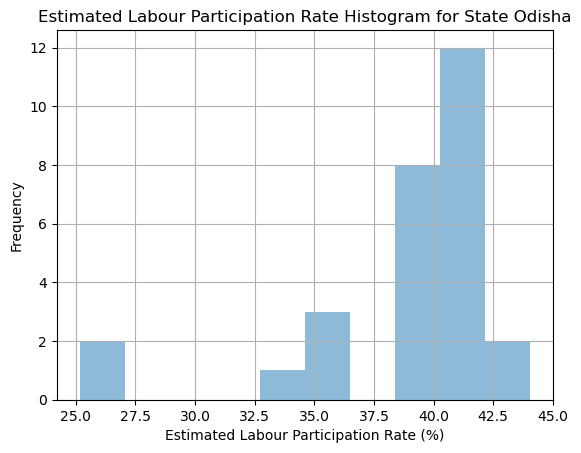

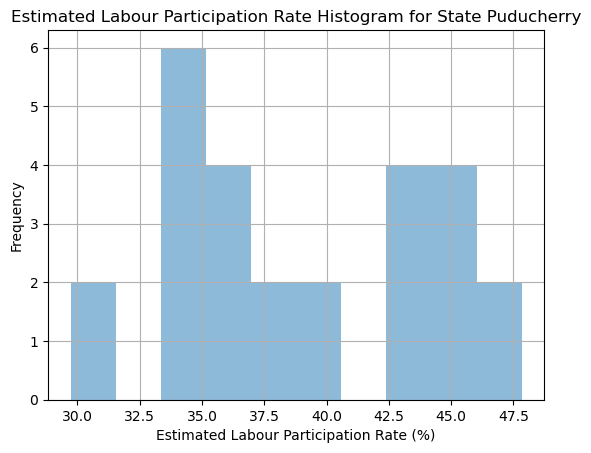

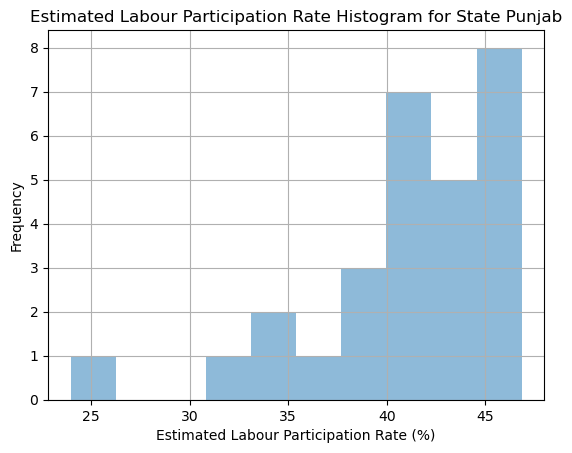

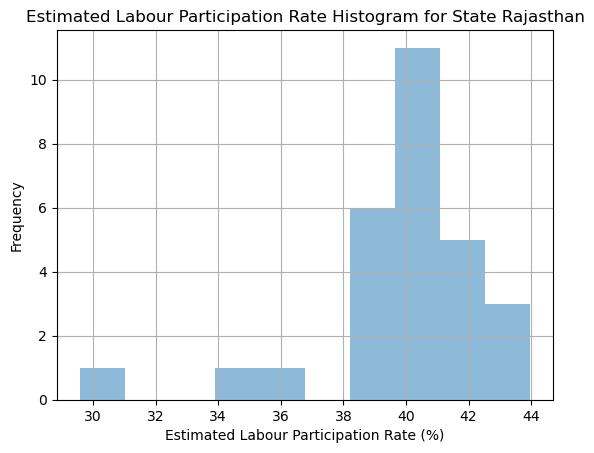

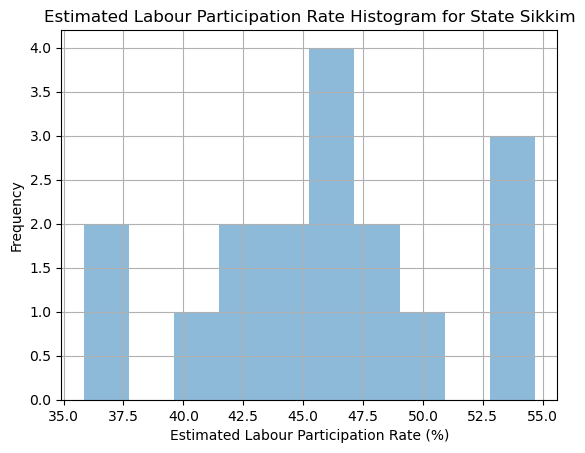

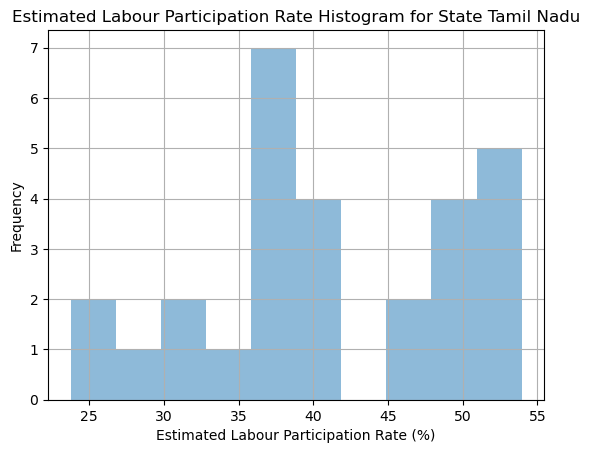

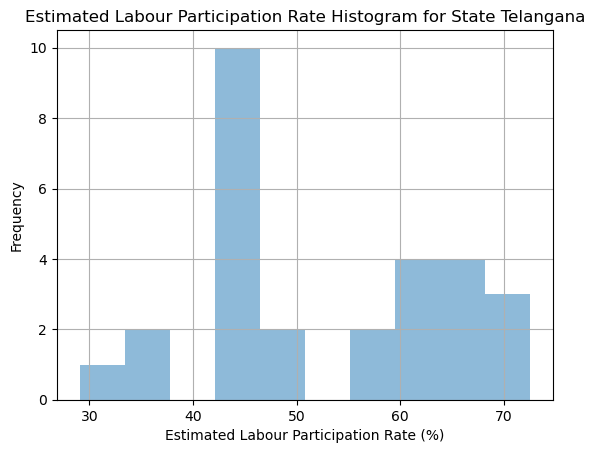

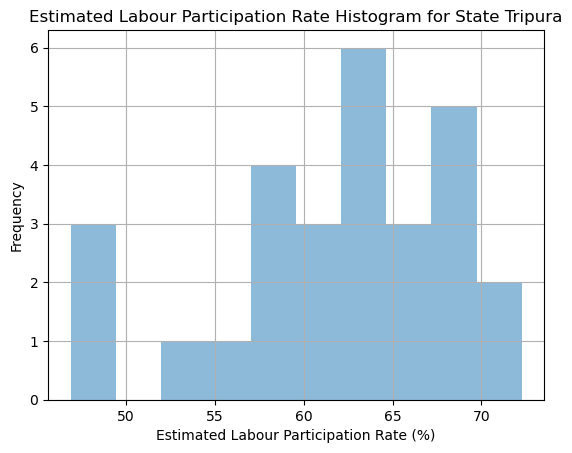

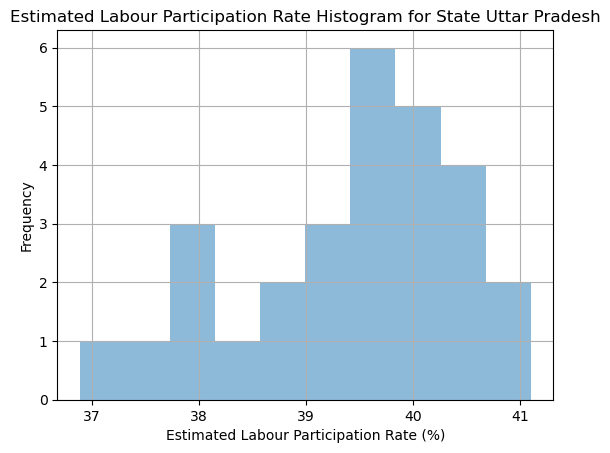

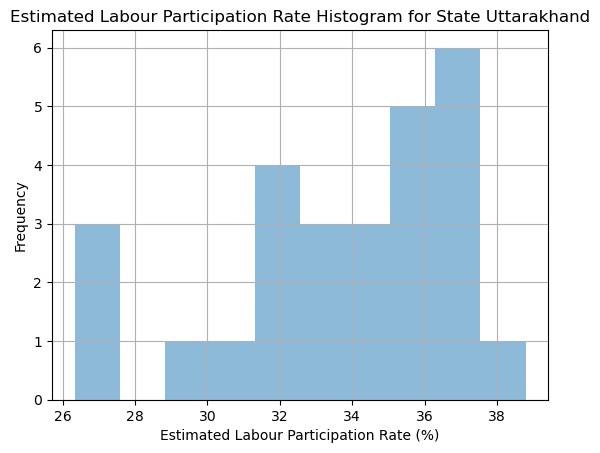

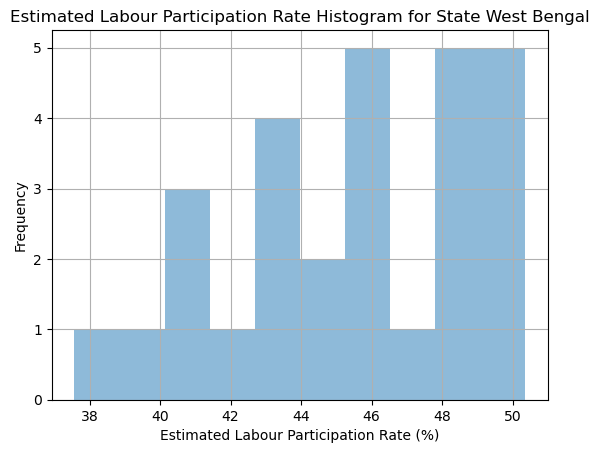

In [7]:
states = df_19_20['State'].unique()

grouped_data = df_19_20.groupby('State')

# Plotting histograms for each state
plt.figure(figsize=(8, 5))
for state, group in grouped_data:
    plt.hist(group[' Estimated_Labour_Participation_Rate (%)'], bins=10, alpha=0.5, label=state)
    plt.xlabel('Estimated Labour Participation Rate (%)')
    plt.ylabel('Frequency')
    plt.title(f'Estimated Labour Participation Rate Histogram for State {state}')
    plt.grid(True)
    plt.show()

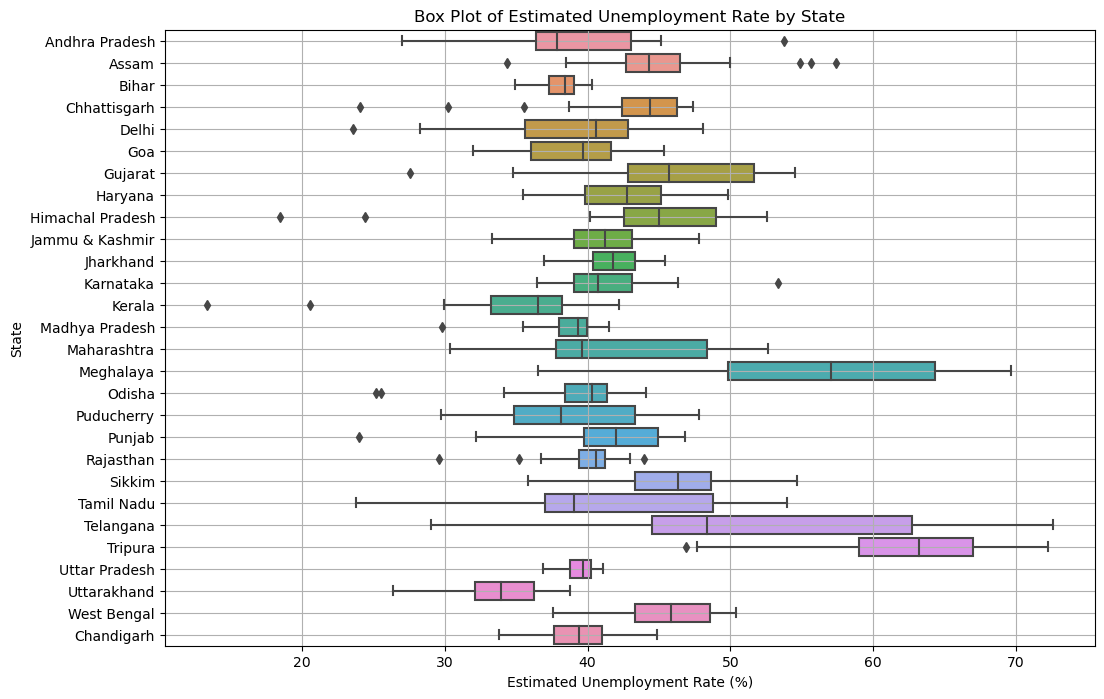

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_19_20 is your DataFrame containing the data
df_19_20 = pd.DataFrame(df_19_20)

# Plotting box plots for estimated unemployment rate (%) separated by states
plt.figure(figsize=(12, 8))
sns.boxplot(x=' Estimated_Labour_Participation_Rate (%)', y='State', data=df_19_20, orient='h')
plt.title('Box Plot of Estimated Unemployment Rate by State')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('State')
plt.grid(True)
plt.show()


### Bivariate Analysis

In [9]:
print(df_19_20.columns)


Index(['State', ' Date', ' Frequency', ' Estimated_Unemployment_Rate (%)',
       ' Estimated_Employed', ' Estimated_Labour_Participation_Rate (%)',
       'Area'],
      dtype='object')


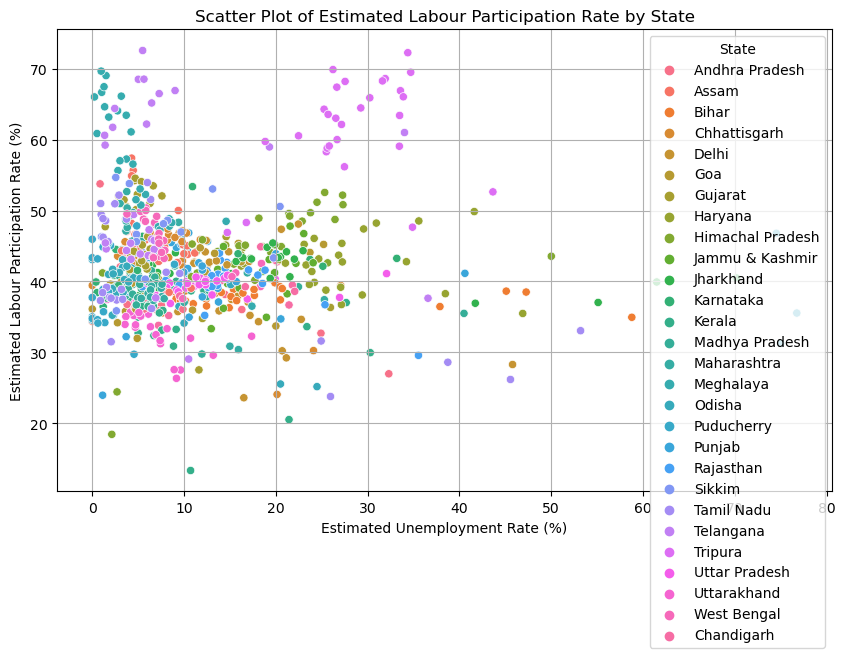

In [10]:
# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated_Unemployment_Rate (%)', 
                y=' Estimated_Labour_Participation_Rate (%)', 
                hue='State', 
                data=df_19_20)  # Use 'data' instead of 'df_19_20'
plt.title('Scatter Plot of Estimated Labour Participation Rate by State')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.grid(True)
plt.show()


There is no linear relationship between the Estimated unemployment rate and the Labour Participation Rate in during 2019-20. Ouliers are present in the data.

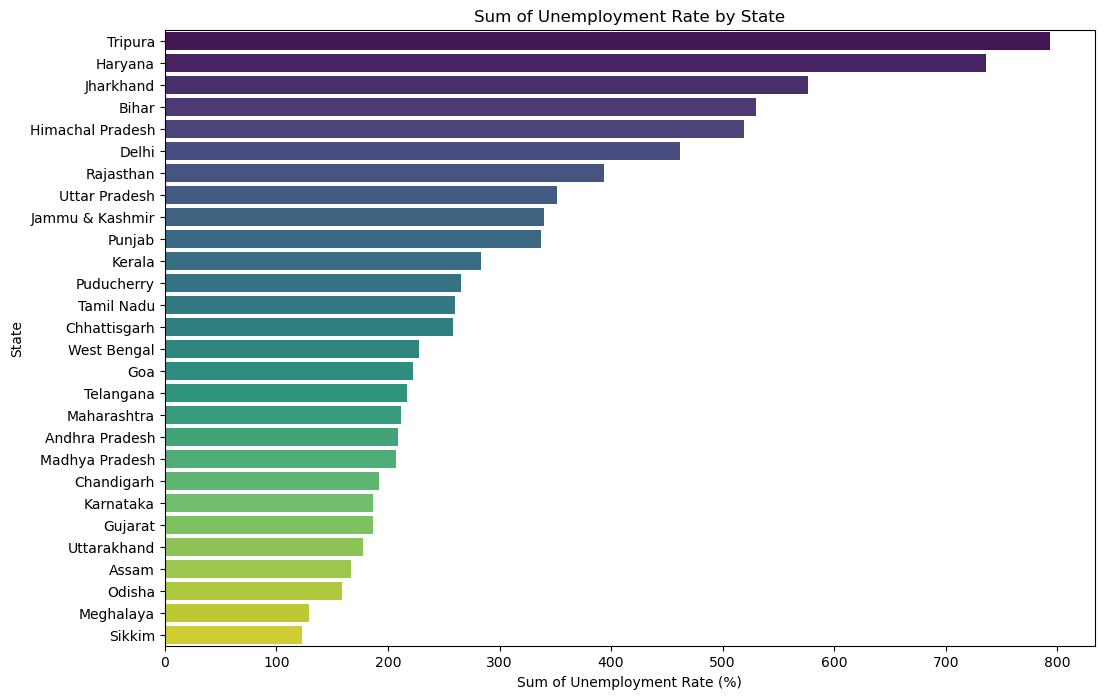

In [11]:
#bar plot
sum_unemployment = df_19_20.groupby('State')[' Estimated_Unemployment_Rate (%)'].sum().reset_index()

# Sort the data by sum of unemployment rate
sum_unemployment = sum_unemployment.sort_values(by=' Estimated_Unemployment_Rate (%)', ascending=False)

# Plotting bar plot for sum of unemployment rate by state
plt.figure(figsize=(12, 8))
sns.barplot(x=' Estimated_Unemployment_Rate (%)', y='State', data=sum_unemployment, palette='viridis')
plt.title('Sum of Unemployment Rate by State')
plt.xlabel('Sum of Unemployment Rate (%)')
plt.ylabel('State')
plt.show()

Out of the whole states in India Tripura is having the most unemployment rate in the year 2019-20 and Sikkim is having the least unemployment rate.

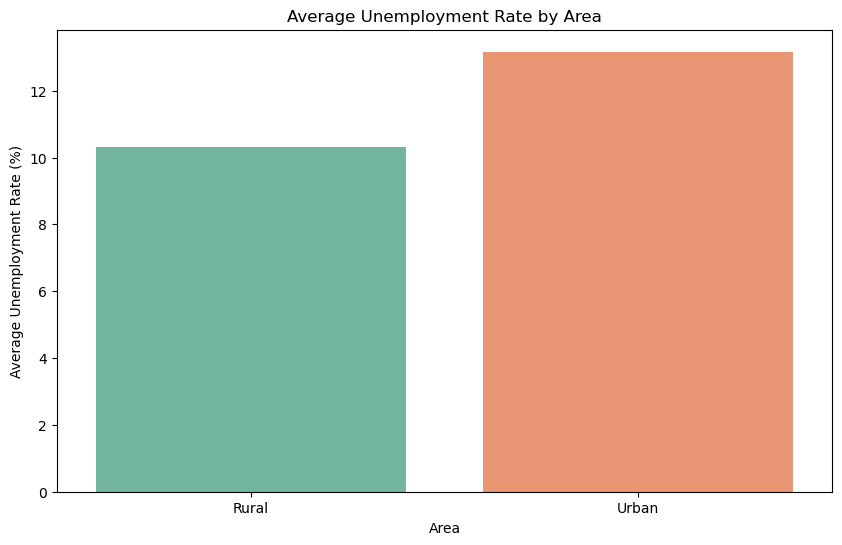

Area    Estimated_Unemployment_Rate (%)
Rural  10.324791                           50.0
Urban  13.166614                           50.0
Name: proportion, dtype: float64


In [12]:
# Calculate the average employment rate for rural and urban areas
average_unemployment = df_19_20.groupby('Area')[' Estimated_Unemployment_Rate (%)'].mean().reset_index()

# Plotting bar plot for average employment rate by area
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y=' Estimated_Unemployment_Rate (%)', data=average_unemployment, palette='Set2')
plt.title('Average Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

print(average_unemployment.value_counts(normalize=True)*100)

As shown in the barplot the unemployment rate is more in urban area(13.16%) of the states compared to that of rural area(10.32%). 

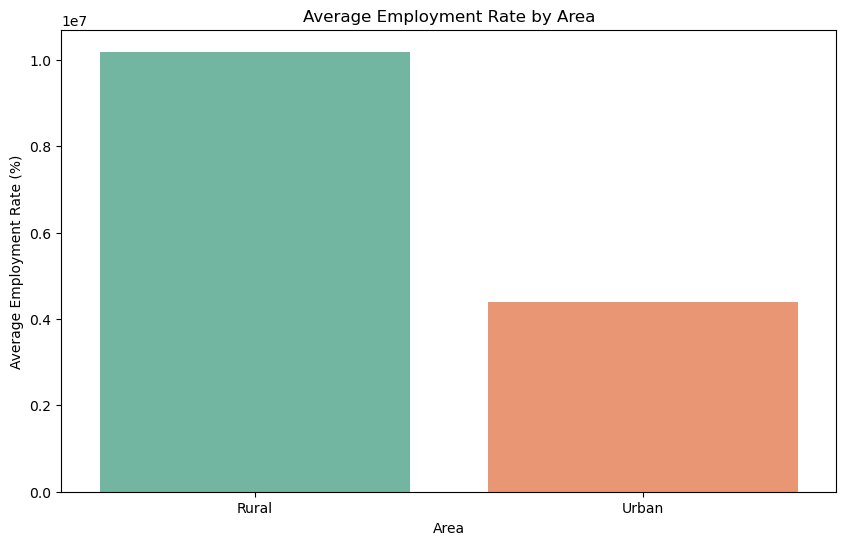

Area    Estimated_Employed
Rural  1.019285e+07           50.0
Urban  4.388626e+06           50.0
Name: proportion, dtype: float64


In [13]:
# Calculate the average employment rate for rural and urban areas
average_employment = df_19_20.groupby('Area')[' Estimated_Employed'].mean().reset_index()

# Plotting bar plot for average employment rate by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Area', y=' Estimated_Employed', data=average_employment, palette='Set2')
plt.title('Average Employment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Average Employment Rate (%)')
plt.show()

print(average_employment.value_counts(normalize=True)*100)

Estimated rate of employment in rural area during the time of covid-19 was comparatively more than that of the urban areas. It can imply that the economic impact of the COVID-19 pandemic varied between rural and urban areas, potentially due to factors such as the types of industries prevalent in each area, access to remote work opportunities, and the resilience of local economies to external shocks.

### 2020-Unemployment Data Analysis

In [14]:
df_20= pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive (7)\\Unemployment_Rate_upto_11_2020.csv")

In [15]:
df_20.head()

,State,Date,Frequency,Estimated_Unemployment_Rate (%),Estimated_Employed,Estimated_Labour_Participation_Rate (%),Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [16]:
df_20.describe()

,Estimated_Unemployment_Rate (%),Estimated_Employed,Estimated_Labour_Participation_Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


### Exploratory Data Analysis

In [17]:
#check for missing values in 2019-2020 data
print(df_20.isnull().sum())
df_20.dropna()
df_20.shape

State                                       0
 Date                                       0
 Frequency                                  0
 Estimated_Unemployment_Rate (%)            0
 Estimated_Employed                         0
 Estimated_Labour_Participation_Rate (%)    0
Region                                      0
longitude                                   0
latitude                                    0
dtype: int64


(267, 9)

### Univariate Analysis

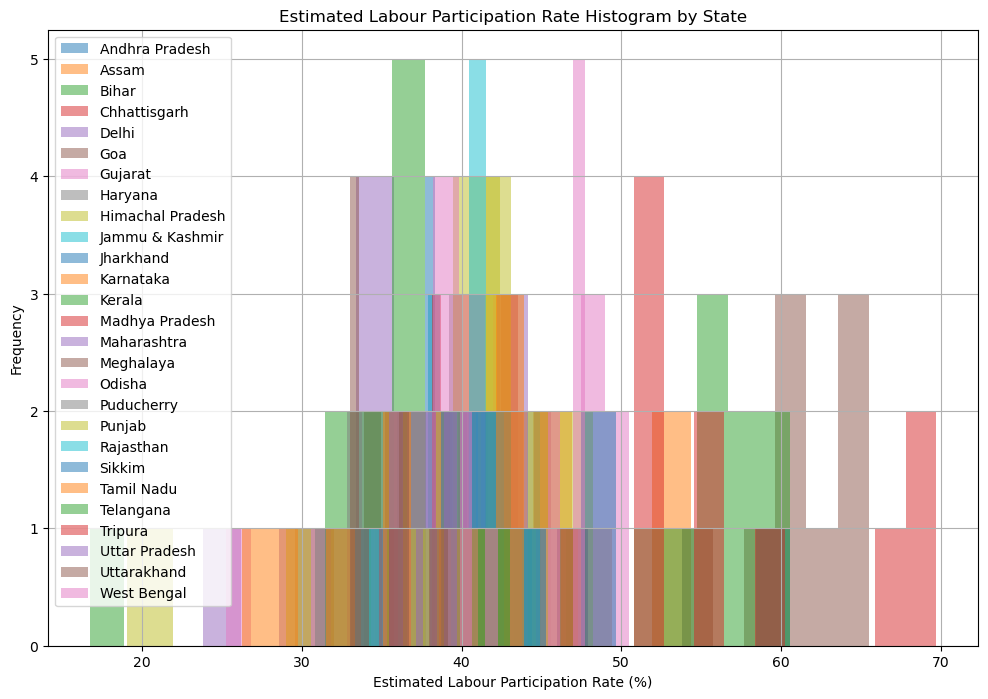

In [26]:
df_20 = pd.DataFrame(df_20)

# Getting unique states
states = df_20['State'].unique()

# Grouping data by state
grouped_data = df_20.groupby('State')

# Plotting histograms for each state
plt.figure(figsize=(12, 8))
for state, group in grouped_data:
    plt.hist(group[' Estimated_Labour_Participation_Rate (%)'], bins=10, alpha=0.5, label=state)

plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Estimated Labour Participation Rate Histogram by State')
plt.legend()
plt.grid(True)
plt.show()

Labour Participation rate is more in Telangana,Jammu & Kashmir and Gujarat.

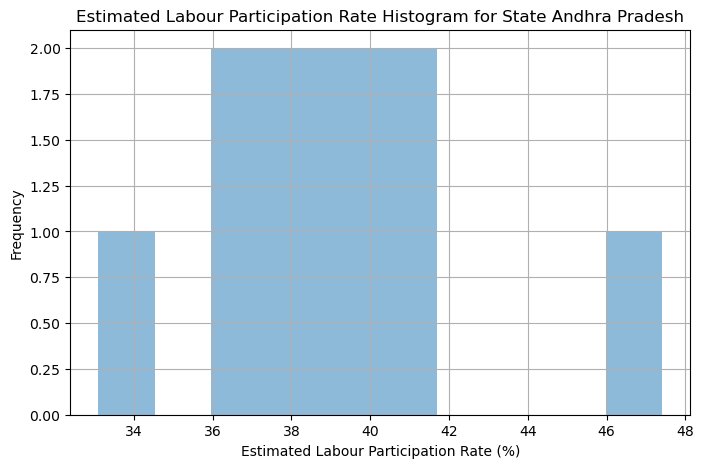

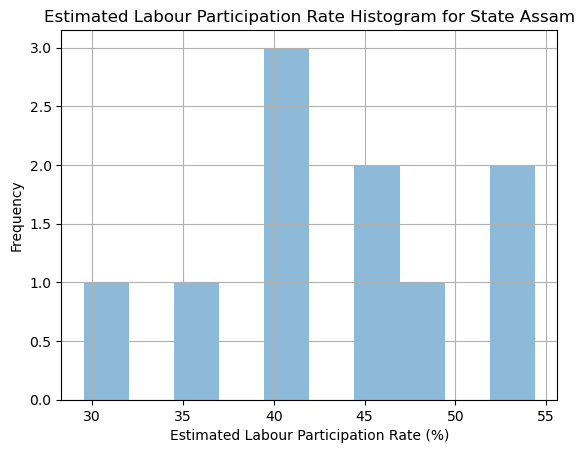

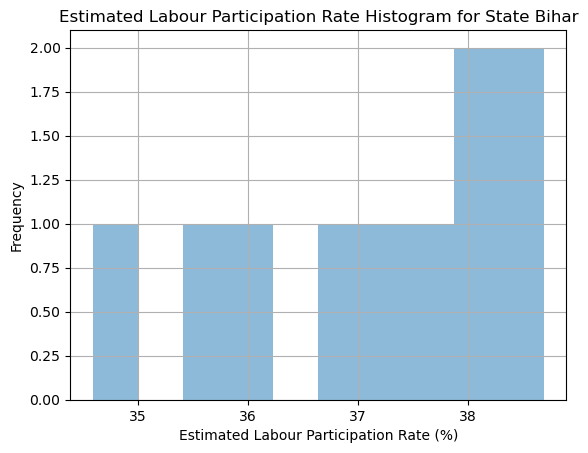

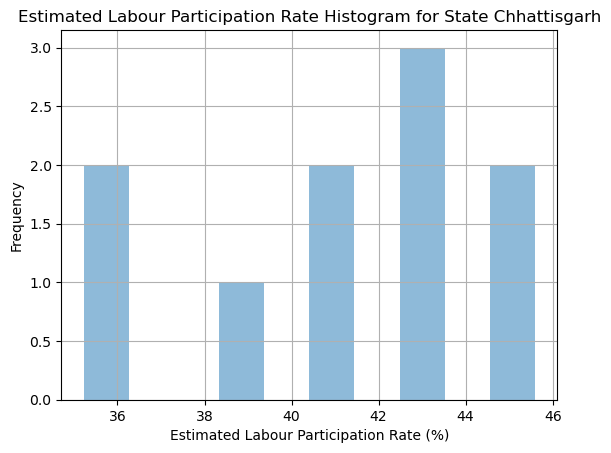

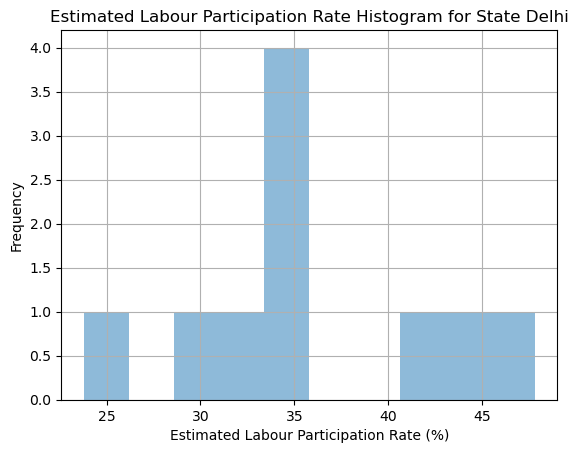

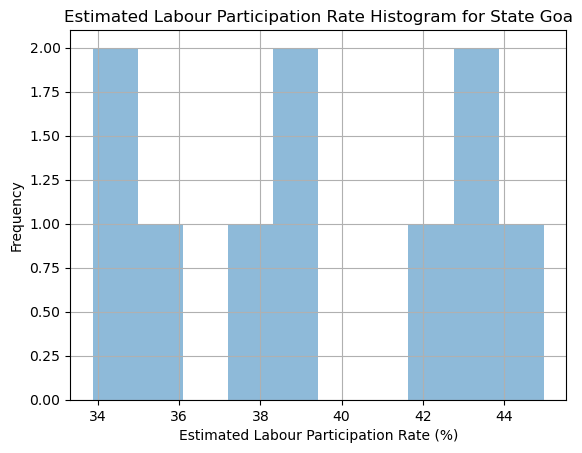

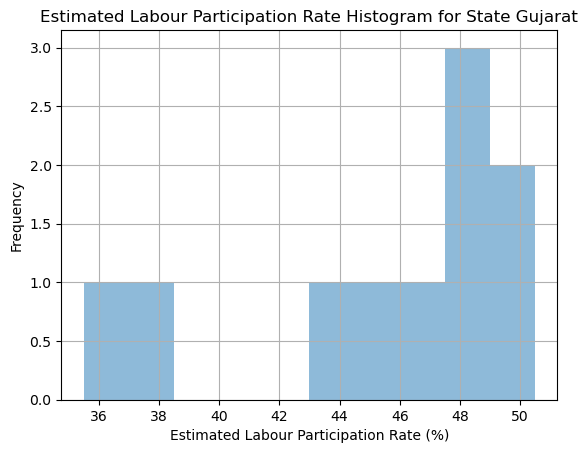

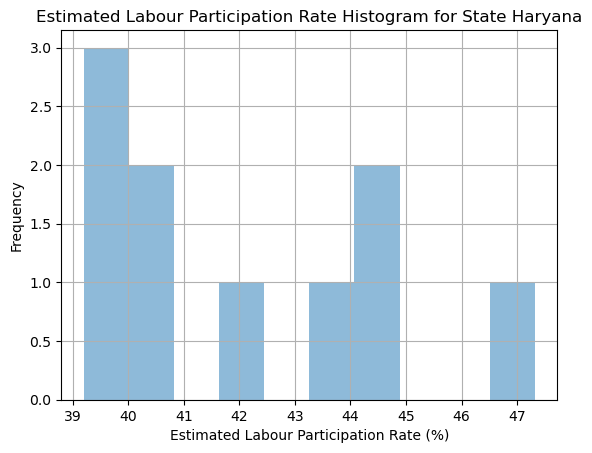

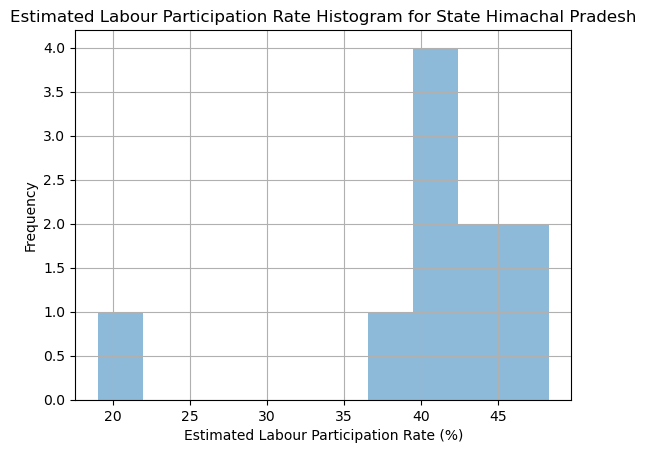

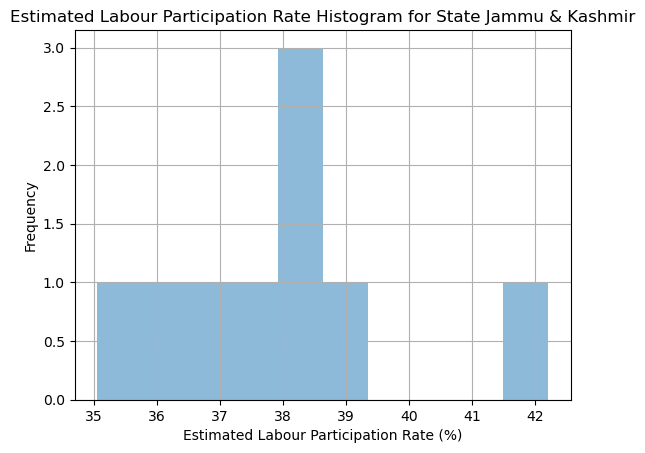

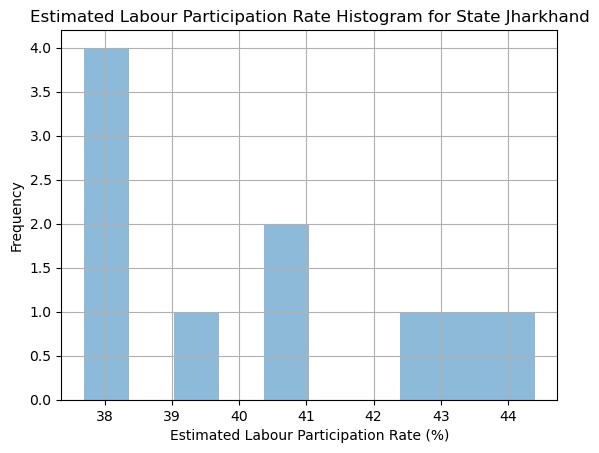

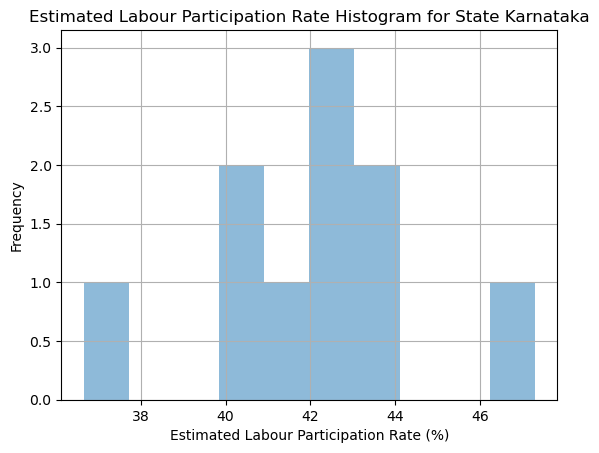

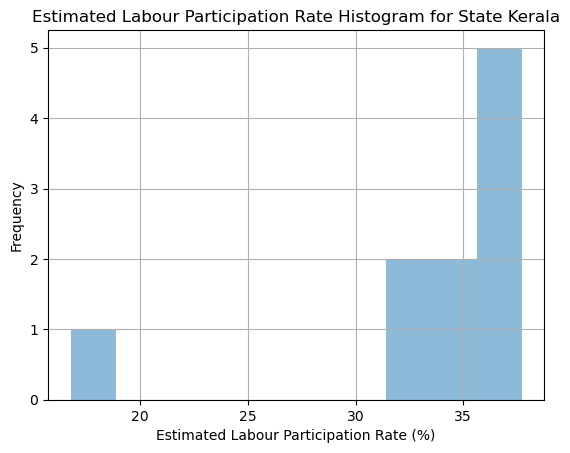

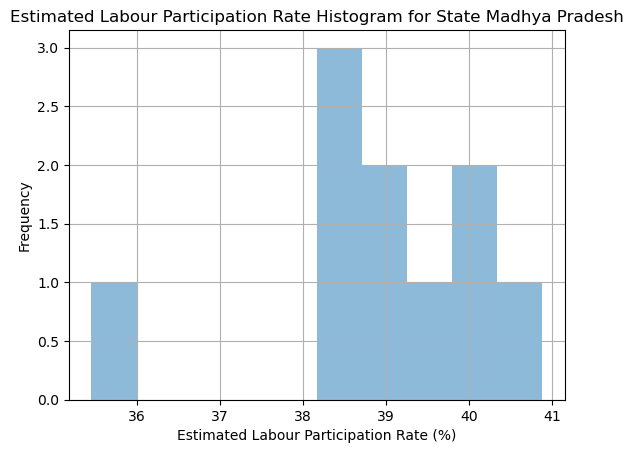

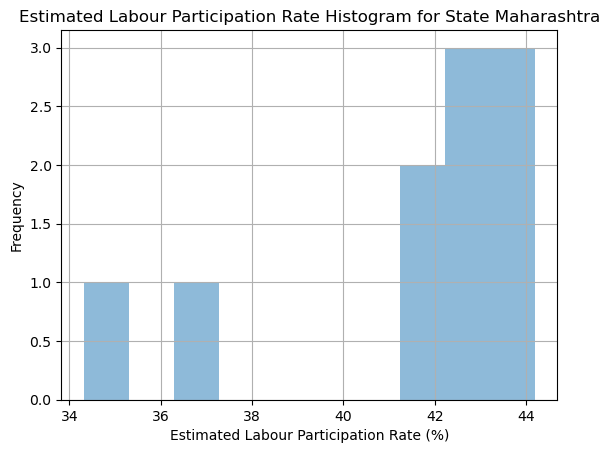

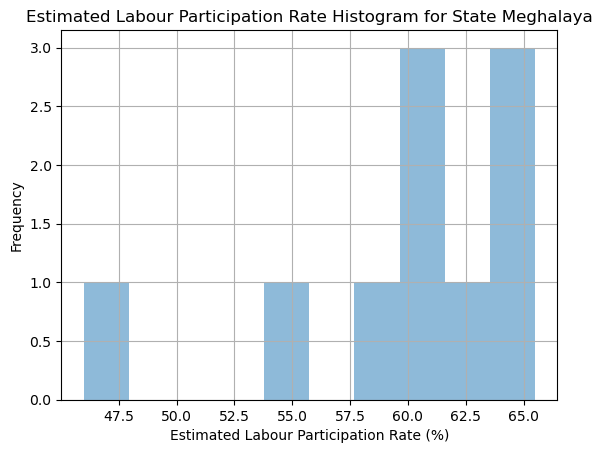

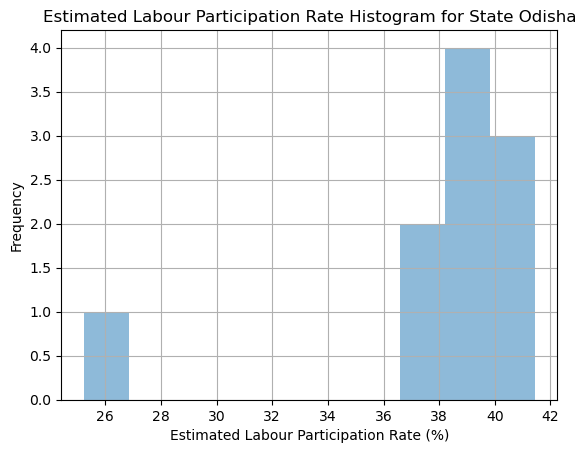

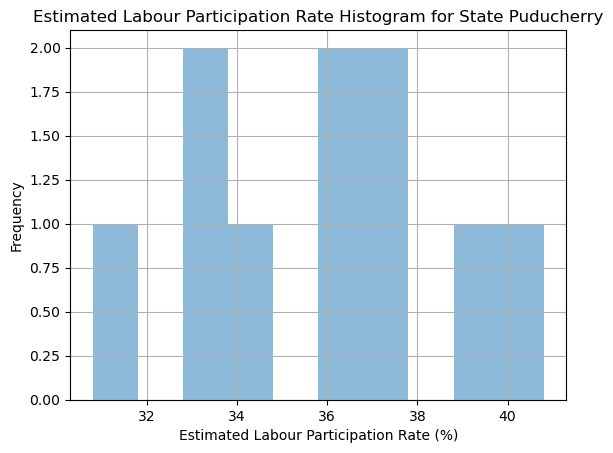

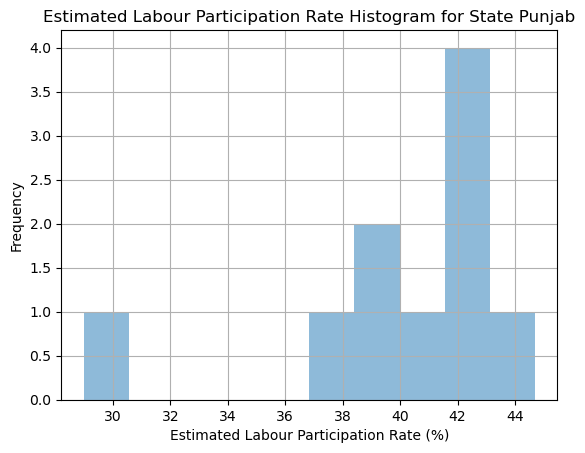

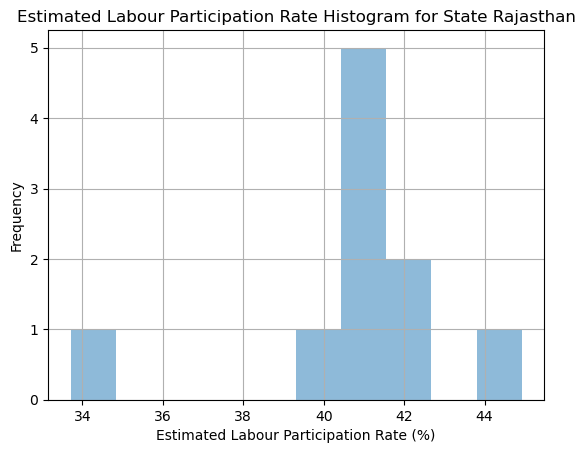

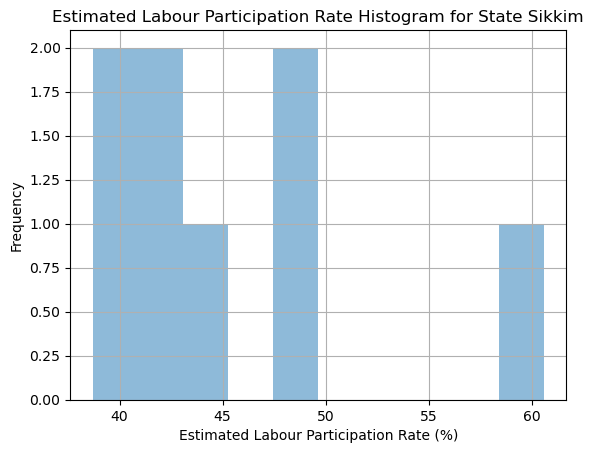

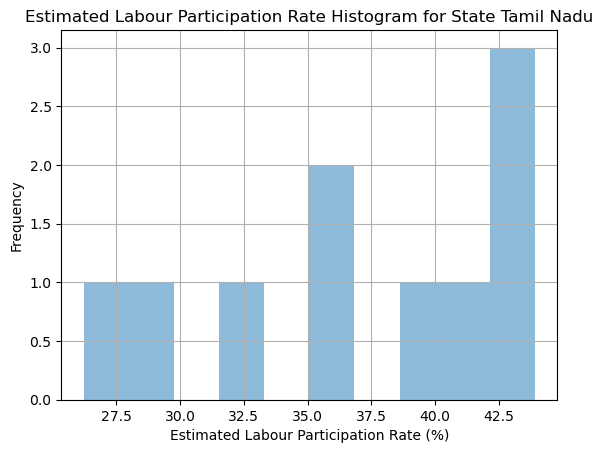

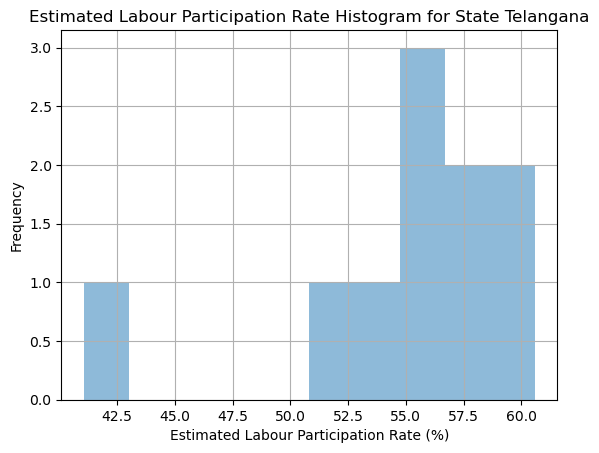

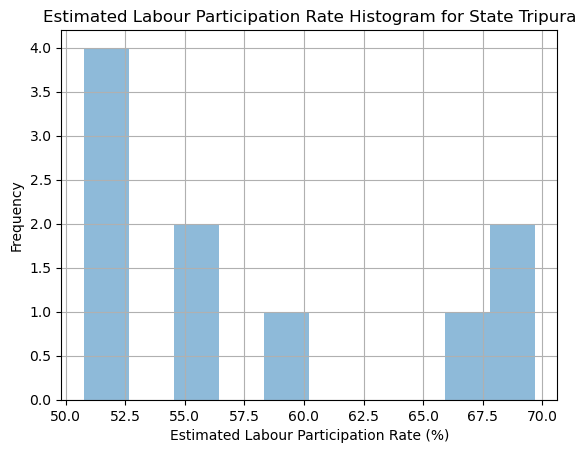

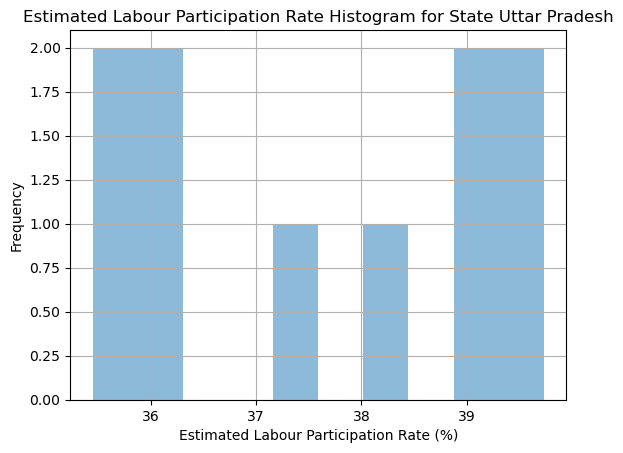

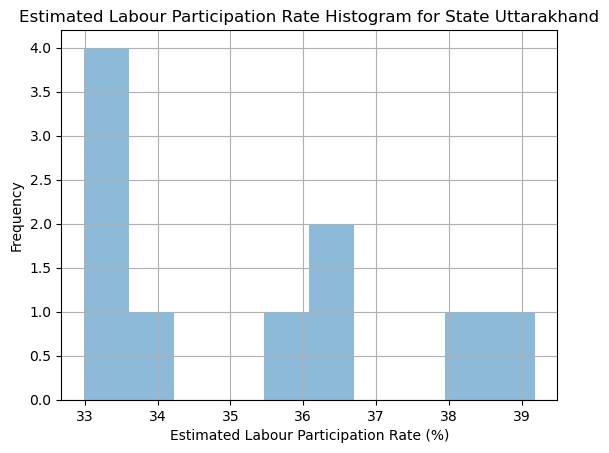

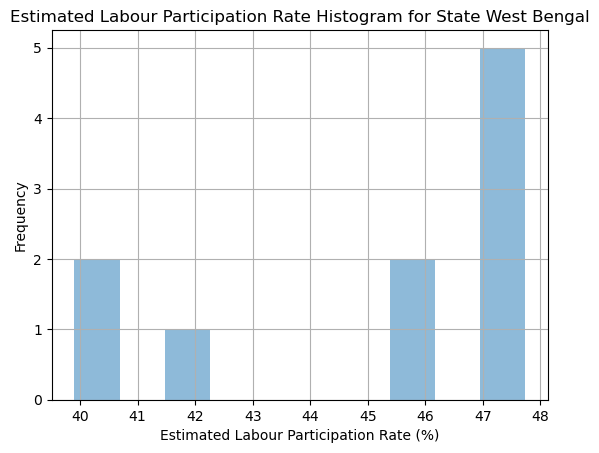

In [19]:
states = df_20['State'].unique()

grouped_data = df_20.groupby('State')

# Plotting histograms for each state
plt.figure(figsize=(8, 5))
for state, group in grouped_data:
    plt.hist(group[' Estimated_Labour_Participation_Rate (%)'], bins=10, alpha=0.5, label=state)
    plt.xlabel('Estimated Labour Participation Rate (%)')
    plt.ylabel('Frequency')
    plt.title(f'Estimated Labour Participation Rate Histogram for State {state}')
    plt.grid(True)
    plt.show()

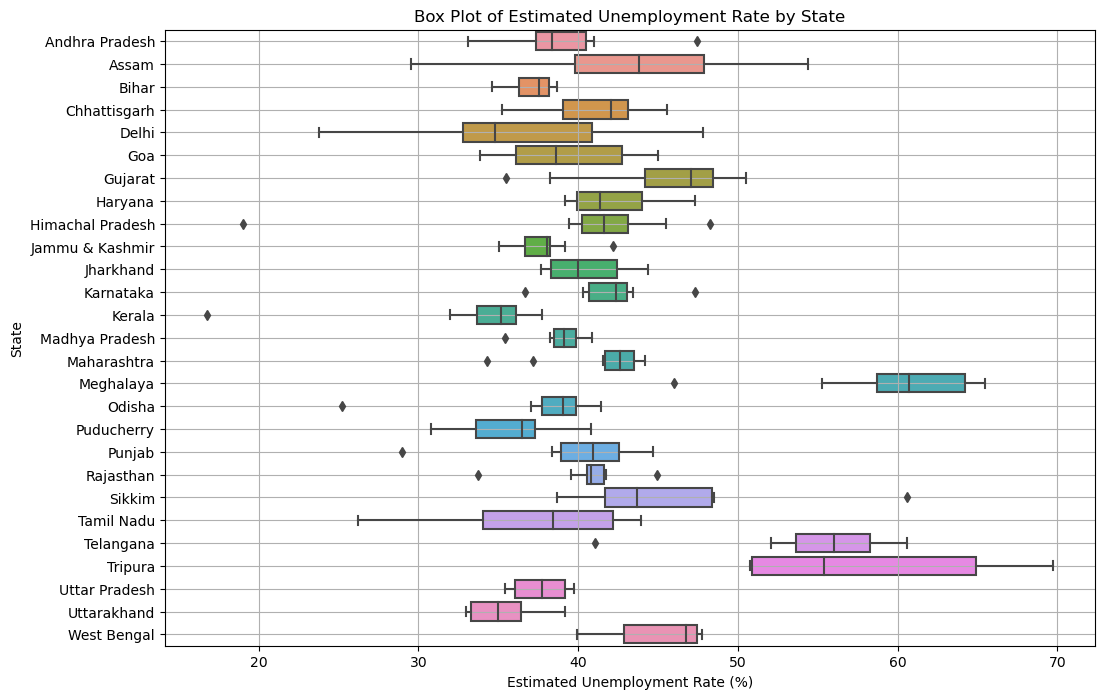

In [20]:
df_20 = pd.DataFrame(df_20)

# Plotting box plots for estimated unemployment rate (%) separated by states
plt.figure(figsize=(12, 8))
sns.boxplot(x=' Estimated_Labour_Participation_Rate (%)', y='State', data=df_20, orient='h')
plt.title('Box Plot of Estimated Unemployment Rate by State')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('State')
plt.grid(True)
plt.show()

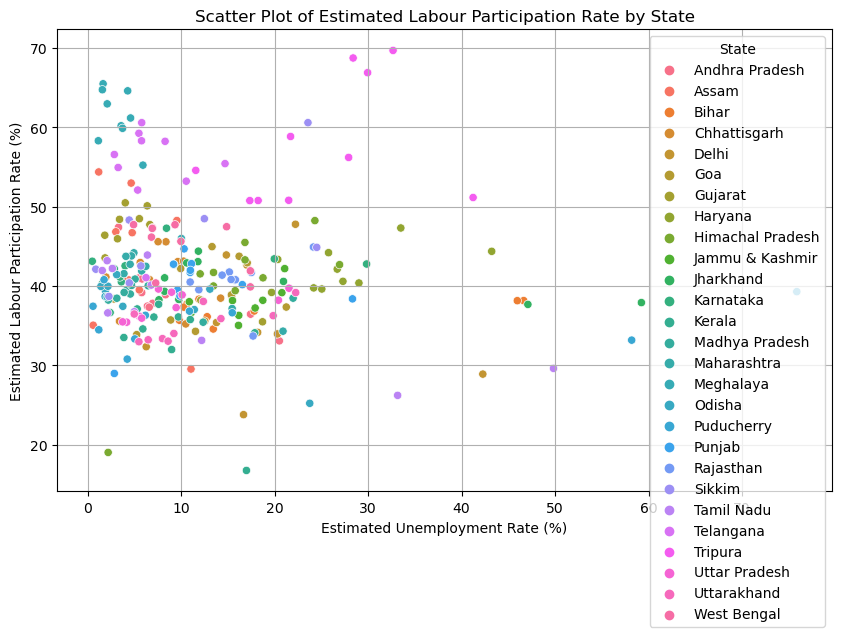

In [21]:
# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated_Unemployment_Rate (%)', 
                y=' Estimated_Labour_Participation_Rate (%)', 
                hue='State', 
                data=df_20)  # Use 'data' instead of 'df_19_20'
plt.title('Scatter Plot of Estimated Labour Participation Rate by State')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.grid(True)
plt.show()

Estimated Unemployment Rate is plotted against the Estimated Labour Particiaption Rate. 

It can be noted that there is no linear relationship between the Unemployment rate and Lbour Participation rate. 

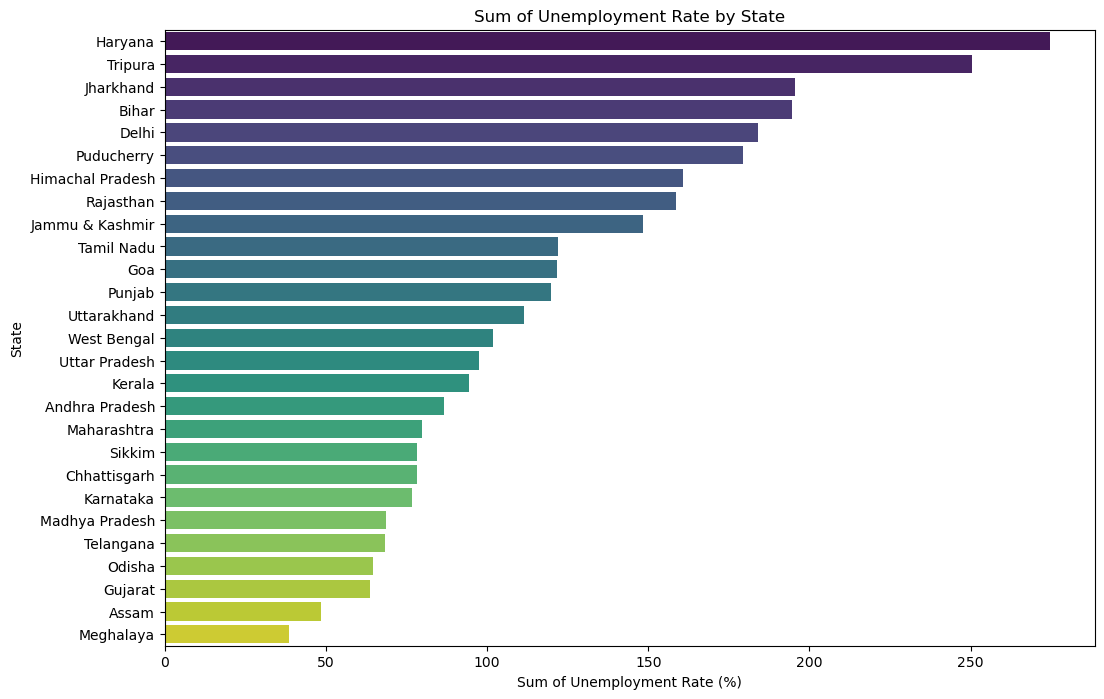

In [22]:
#bar plot
sum_unemployment = df_20.groupby('State')[' Estimated_Unemployment_Rate (%)'].sum().reset_index()

# Sort the data by sum of unemployment rate
sum_unemployment = sum_unemployment.sort_values(by=' Estimated_Unemployment_Rate (%)', ascending=False)

# Plotting bar plot for sum of unemployment rate by state
plt.figure(figsize=(12, 8))
sns.barplot(x=' Estimated_Unemployment_Rate (%)', y='State', data=sum_unemployment, palette='viridis')
plt.title('Sum of Unemployment Rate by State')
plt.xlabel('Sum of Unemployment Rate (%)')
plt.ylabel('State')
plt.show()

The state Haryana contains more unemploment rate and Tripura comes next.

Least unemployment rate is found in Meghalaya

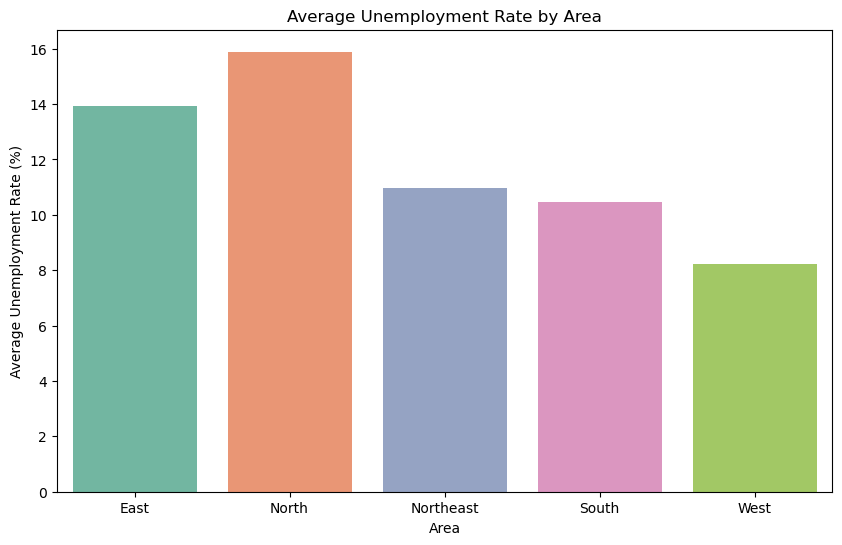

Region      Estimated_Unemployment_Rate (%)
East       13.916000                           20.0
North      15.889620                           20.0
Northeast  10.950263                           20.0
South      10.454667                           20.0
West       8.239000                            20.0
Name: proportion, dtype: float64


In [23]:
# Calculate the average employment rate for rural and urban areas
average_unemployment = df_20.groupby('Region')[' Estimated_Unemployment_Rate (%)'].mean().reset_index()

# Plotting bar plot for average employment rate by area
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y=' Estimated_Unemployment_Rate (%)', data=average_unemployment, palette='Set2')
plt.title('Average Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

print(average_unemployment.value_counts(normalize=True)*100)

Unemployment rate was more in the northern states and least in the western states of India in the year 2020.

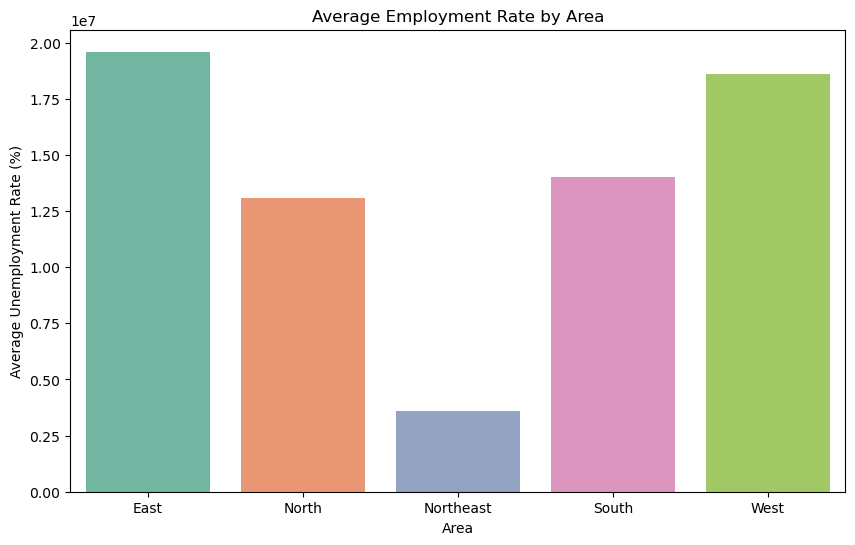

Region      Estimated_Employed
East       1.960237e+07           20.0
North      1.307249e+07           20.0
Northeast  3.617106e+06           20.0
South      1.404059e+07           20.0
West       1.862351e+07           20.0
Name: proportion, dtype: float64


In [25]:
# Calculate the average employment rate for rural and urban areas
average_employment = df_20.groupby('Region')[' Estimated_Employed'].mean().reset_index()

# Plotting bar plot for average employment rate by area
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y=' Estimated_Employed', data=average_employment, palette='Set2')
plt.title('Average Employment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

print(average_employment.value_counts(normalize=True)*100)

Most of the people in the Eastern side of India were employed in the year 2020 whereas employment rate in Northeastern states were low.

### Conclusion

Based on the analysis of datasets from the COVID-19 period, it is evident that the unemployment rate in the states of India increased rapidly during this time. The visualization of the data clearly illustrates the significant impact of the pandemic on the labor market across various states.